<a href="https://colab.research.google.com/github/happy6196/World-Bank-Global-Education-Analysis/blob/main/Ashwani's_World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [3]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Read and Stored CSV Files***

In [5]:
path='/content/drive/MyDrive/Colab Notebooks/Project/'
Country_Series_df= pd.read_csv(path + 'EdStatsCountry-Series.csv')
Country_df= pd.read_csv(path + 'EdStatsCountry.csv')
Data_df= pd.read_csv(path + 'EdStatsData.csv')
FootNote_df= pd.read_csv(path + 'EdStatsFootNote.csv')
Series_df= pd.read_csv(path + 'EdStatsSeries.csv')

# ***Analysis of DataFrames***

----

# ***Analysis of EdStatsCountry-Series.csv File***









In [6]:
Country_Series_df.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [7]:
Country_Series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


**Data Cleansing**

In [8]:
#Delete Column Unnamed: 3
new_Country_Series_df=Country_Series_df.drop('Unnamed: 3',axis=1)
new_Country_Series_df

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


In [9]:
new_Country_Series_df.rename(columns={'CountryCode':'Country Code','SeriesCode':'Series Code'},inplace=True)

In [10]:
new_Country_Series_df.describe()

,Country Code,Series Code,DESCRIPTION
count,613,613,613
unique,211,21,97
top,GEO,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


# ***Analysis of EdStatsCountry.csv File***

In [11]:
Country_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


**Data Cleansing**

In [12]:
Country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [13]:
#Delete Column Unnamed: 31
new_Country_df=Country_df.drop('Unnamed: 31',axis=1)

In [14]:
#Remove Decimal from year
new_Country_df['National accounts reference year']=new_Country_df['National accounts reference year'].fillna('0').apply(lambda x: int(x) if(x!='0') else 'NaN')


In [15]:
#Remove Decimal from year
new_Country_df['Latest trade data']=new_Country_df['Latest trade data'].fillna('0').apply(lambda x: int(x) if(x!='0') else 'NaN')


In [16]:
#Remove Decimal from year
new_Country_df['Latest industrial data']=new_Country_df['Latest industrial data'].fillna('0').apply(lambda x: int(x) if(x!='0') else 'NaN')


After converting float64 into object

In [17]:
new_Country_df.describe()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,205,241,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,241,241,179
unique,241,241,241,241,238,152,131,7,5,240,43,12,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,12,14,20
top,HIC,Brunei,"Yemen, Rep.",State of Eritrea,XQ,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,XQ,2005,NaN,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,2012,2005
freq,1,1,1,1,1,23,6,57,55,1,34,209,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,134,135,40


In [18]:
new_Country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Country Code                                       241 non-null    object
 1   Short Name                                         241 non-null    object
 2   Table Name                                         241 non-null    object
 3   Long Name                                          241 non-null    object
 4   2-alpha code                                       238 non-null    object
 5   Currency Unit                                      215 non-null    object
 6   Special Notes                                      145 non-null    object
 7   Region                                             214 non-null    object
 8   Income Group                                       214 non-null    object
 9   WB-2 code            

# ***Analysis of EdStatsData.csv File***

In [19]:
Data_df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

**Data Cleansing**

zero non-null values in Unnamed: 69

In [21]:
#Remove column Unnamed: 69
new_Data_df=Data_df.drop('Unnamed: 69',axis=1)

Overall, 242 countries are present with 3665 indicators.

In [22]:
#sorted four object columns details 
new_Data_df[['Country Name','Country Code','Indicator Name','Indicator Code']].describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Burundi,TTO,"Net enrolment rate, secondary, gender parity i...",LO.EGRA.ORF.SID.3GRD
freq,3665,3665,242,242


# ***Analysis of EdStatsFootNote.csv File***

In [23]:
FootNote_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [24]:
FootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


**Data Cleansing**

Remove Column Unnamed: 4 having zero values

In [25]:
#Remove Column Unnamed: 4
new_FootNote_df=FootNote_df.drop('Unnamed: 4',axis=1)

In [26]:
new_FootNote_df['Year']=new_FootNote_df['Year'].str.lstrip('YR')

In [27]:
new_FootNote_df.rename(columns={'CountryCode':'Country Code','SeriesCode':'Series Code'},inplace=True)

In [28]:
new_FootNote_df

,Country Code,Series Code,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,2017,5-year average value between 0s and 5s


In [29]:
new_FootNote_df.describe()

,Country Code,Series Code,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,2004,Country Data
freq,7320,9226,27128,191188


In [30]:
#Remove if any row repeated
new_FootNote_df.drop_duplicates()

,Country Code,Series Code,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,2017,5-year average value between 0s and 5s


# ***Analysis of EdStatsSeries.csv File***

In [31]:
Series_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
Series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

**Data Cleansing**

Remove all the columns having all null values

In [33]:
#Remove columns 'Unnamed: 20','License Type','Related indicators','Other web links','Notes from original source','Unit of measure'
new_Series_df=Series_df.drop(['Unnamed: 20','License Type','Related indicators','Other web links','Notes from original source','Unit of measure'],axis=1)

In [34]:
new_Series_df.describe()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,UIS.AFR.SCHBSP.2.PU.WNITOIL,Learning Outcomes,MICS: Secondary completion rate. Quintile 5,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,The criteria for people considered to be seeki...,Data up to 2016 are estimates while data from ...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


#***Analyzing Data with Graphs***

-----



# Graph representing **No of countries per Region**

In [35]:
country_counts=new_Country_df.groupby('Region')['Short Name'].nunique().reset_index()

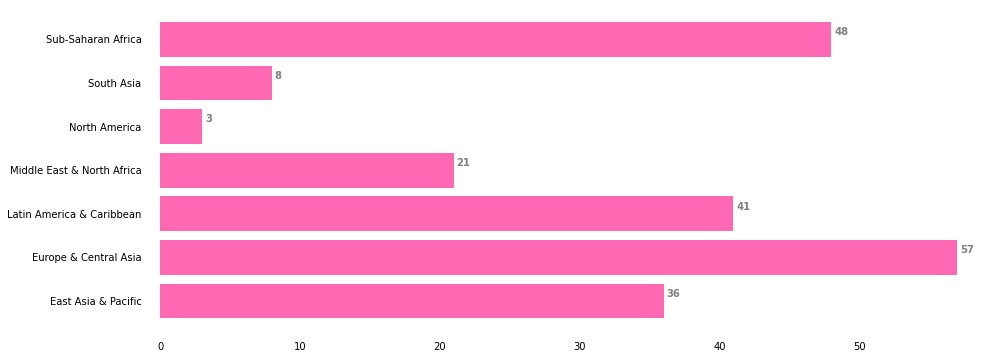

In [36]:
fig,hx = plt.subplots(figsize =(15, 6))
hx.barh(country_counts['Region'],country_counts['Short Name'],color='hotpink')
for s in ['top', 'bottom', 'left', 'right']:
    hx.spines[s].set_visible(False)
hx.xaxis.set_ticks_position('none')
hx.yaxis.set_ticks_position('none')    
hx.xaxis.set_tick_params(pad = 5)
hx.yaxis.set_tick_params(pad = 15)
for i in hx.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Graph representing No. of countries per Income Group

In [37]:
income_group=new_Country_df.groupby('Income Group')['Short Name'].nunique().reset_index()
income_group=income_group.rename(columns={'Short Name':'Country'})

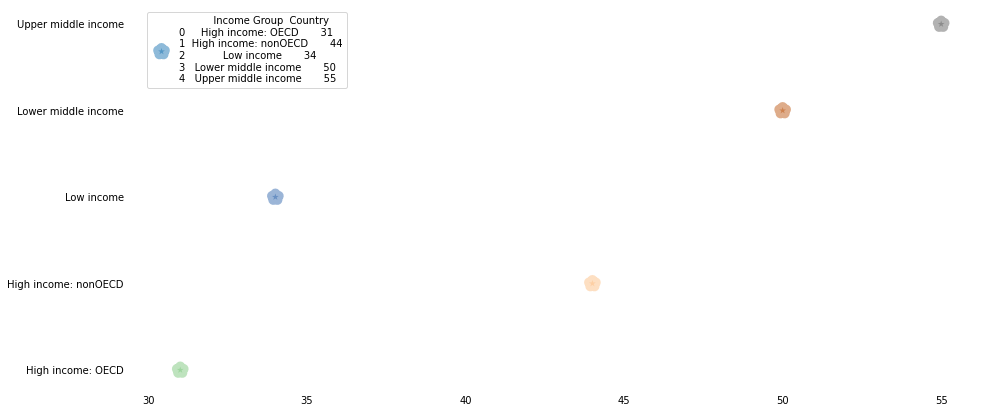

In [38]:
x=income_group['Country']
y=income_group['Income Group']

fig,hx = plt.subplots(figsize =(15, 7))
hx.scatter(x,y,label=income_group,alpha=0.5,s=50,c=[30,35,40,45,50],cmap='Accent',marker='*',linewidths=10)
for s in ['top', 'bottom', 'left', 'right']:
    hx.spines[s].set_visible(False)
hx.xaxis.set_ticks_position('none')
hx.yaxis.set_ticks_position('none')    
hx.xaxis.set_tick_params(pad = 5)
hx.yaxis.set_tick_params(pad = 15)
for i in hx.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
hx.legend( loc='best')    

# Graph representing Income group of countries per year according to Indicator Name

Merging EdStatsData and EdStatsCountry for Income Group with Data_df

In [39]:
stats_income_data_df=new_Data_df.merge(new_Country_df[['Income Group','Short Name']],right_on='Short Name',left_on='Country Name')

In [40]:
def graph(IN,yr):
  col=['Country Name','Income Group','Indicator Name']
  col.extend(list(np.arange(yr,2016,1).astype(str)))
  stats_group=stats_income_data_df[stats_income_data_df['Indicator Name']==IN].loc[:,col]
  stats_group = stats_group.groupby('Income Group').mean(numeric_only=True).reset_index()
  for i in range(5):
    xlab=stats_group.columns[1:]
    ylab=stats_group.iloc[i][1:]
    plt.plot(xlab,ylab,label=stats_group.iloc[i,0],linestyle=random.choice([':','-','-.','--']),marker='o',markersize=8,linewidth=2,mfc=random.choice(['r','g','b','c','y']),mec=random.choice(['r','g','b','c','m','y','k']))
    plt.xlabel('Year',size=15)
    plt.ylabel(IN,size=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.rcParams['figure.figsize'] = (15,6)
    plt.title(IN+' vs Years')
    


In [41]:
new_Data_df[['Indicator Code','Indicator Name']]

,Indicator Code,Indicator Name
0,UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, ..."
1,UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, ..."
2,UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, ..."
3,UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, ..."
4,SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sex..."
...,...,...
886925,UIS.LP.AG15T24.M,"Youth illiterate population, 15-24 years, male..."
886926,SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, b..."
886927,SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, f..."
886928,SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, g..."


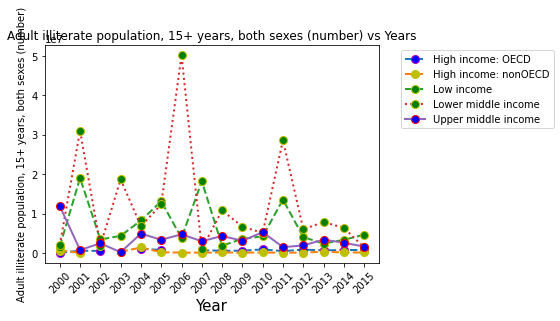

In [42]:
# Adult illiterate population, 15+ years, both sexes (number)
graph('Adult illiterate population, 15+ years, both sexes (number)',2000)

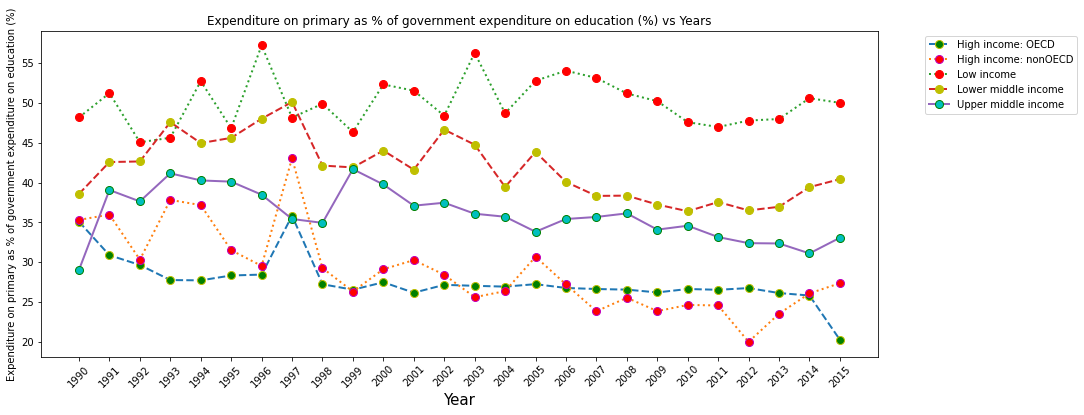

In [43]:
# Expenditure on primary as % of government expenditure on education (%)
graph('Expenditure on primary as % of government expenditure on education (%)',1990)

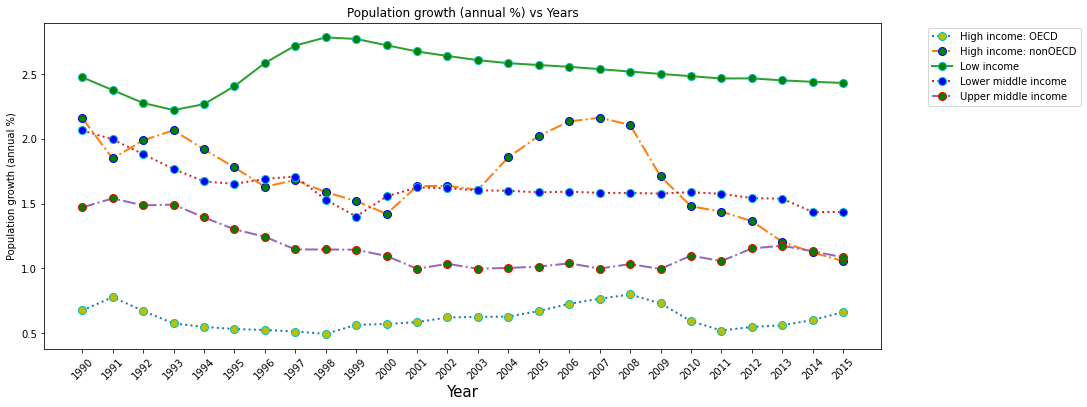

In [44]:
#'Population growth (annual %)'
graph('Population growth (annual %)',1990)

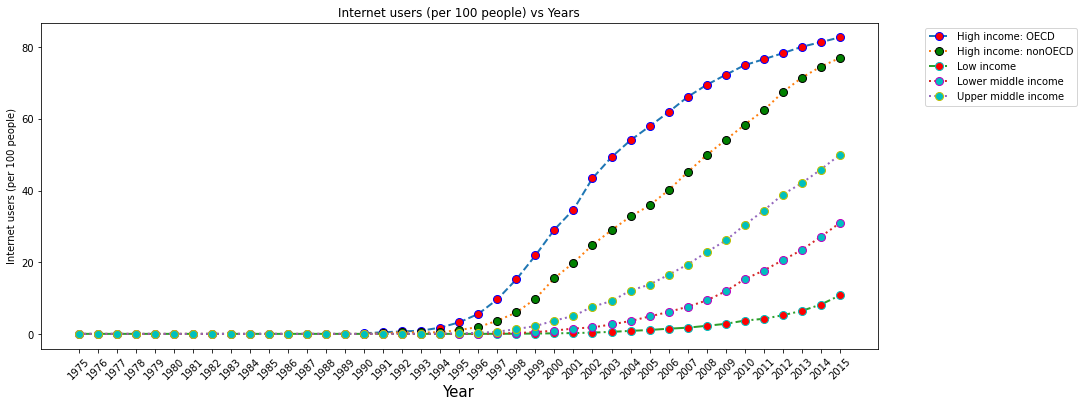

In [45]:
# 'Internet users (per 100 people)'
graph('Internet users (per 100 people)',1975)

# Graph representing Comparision of Contries on the basis of Indicators

In [46]:
def Country_indicator(INDI,yr,c1=None,c2=None,c3=None,c4=None,c5=None,c6=None):
  c=[c1,c2,c3,c4,c5,c6]
  col=['Country Name']
  col.extend(list(np.arange(yr,2016,1).astype(str)))
  unique_indicator_countries=new_Data_df[new_Data_df['Indicator Name']==INDI].loc[:,col].groupby('Country Name').mean().reset_index()
  if c1 or c2 or c3 or c4 or c5 or c6!=None:
    for j in range(6):
      if c[int(j)]!=None:
        unique_indicator_countries_country=unique_indicator_countries[unique_indicator_countries['Country Name']==c[int(j)]]
        xlab=unique_indicator_countries_country.columns[1:]
        ylab=unique_indicator_countries_country.iloc[0][1:]
        d=len(unique_indicator_countries_country.columns)-1
        plt.scatter(xlab,ylab,label=unique_indicator_countries_country.iloc[0,0],alpha=0.5,cmap='nipy_spectral',s=random.randint(100,size=(d)))
        plt.xlabel('Year',size=15)
        plt.ylabel(INDI,size=10)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.rcParams['figure.figsize'] = (15,5)
        plt.title(INDI+' vs Years')
  else:
    for i in range(10):
      xlab=unique_indicator_countries.columns[1:]
      ylab=unique_indicator_countries.iloc[i][1:]
      d=len(unique_indicator_countries.columns)-1
      plt.scatter(xlab,ylab,label=unique_indicator_countries.iloc[i,0],alpha=0.5,cmap='nipy_spectral',s=random.randint(100,size=(d)))
      plt.xlabel('Year',size=15)
      plt.ylabel(INDI+' Rate',size=10)
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.xticks(rotation=45)
      plt.rcParams['figure.figsize'] = (15,5)
      plt.title(INDI+' vs Years')
  

In [47]:
pd.DataFrame(new_Data_df['Indicator Name'].unique())

,0
0,"Adjusted net enrolment rate, lower secondary, ..."
1,"Adjusted net enrolment rate, lower secondary, ..."
2,"Adjusted net enrolment rate, lower secondary, ..."
3,"Adjusted net enrolment rate, lower secondary, ..."
4,"Adjusted net enrolment rate, primary, both sex..."
...,...
3660,"Youth illiterate population, 15-24 years, male..."
3661,"Youth literacy rate, population 15-24 years, b..."
3662,"Youth literacy rate, population 15-24 years, f..."
3663,"Youth literacy rate, population 15-24 years, g..."


In [48]:
pd.DataFrame(new_Data_df['Country Name'].unique())

,0
0,Arab World
1,East Asia & Pacific
2,East Asia & Pacific (excluding high income)
3,Euro area
4,Europe & Central Asia
...,...
237,Virgin Islands (U.S.)
238,West Bank and Gaza
239,"Yemen, Rep."
240,Zambia


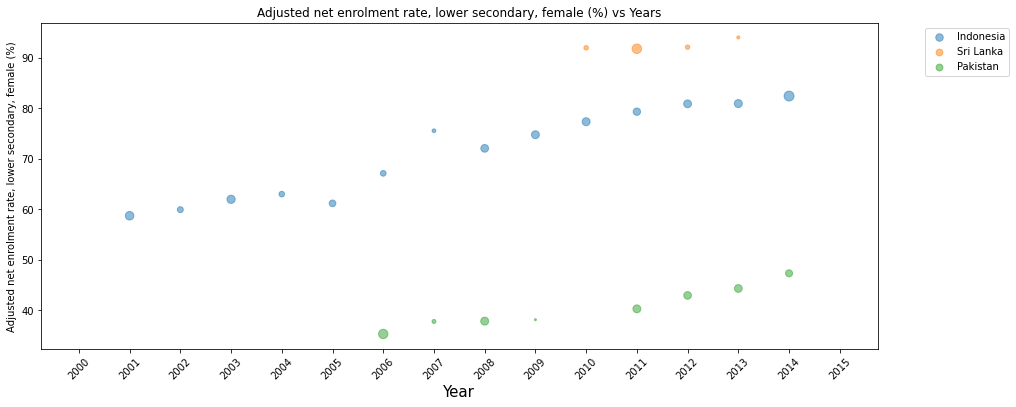

In [50]:
Country_indicator('Adjusted net enrolment rate, lower secondary, female (%)',2000,'Indonesia','Sri Lanka','Pakistan')

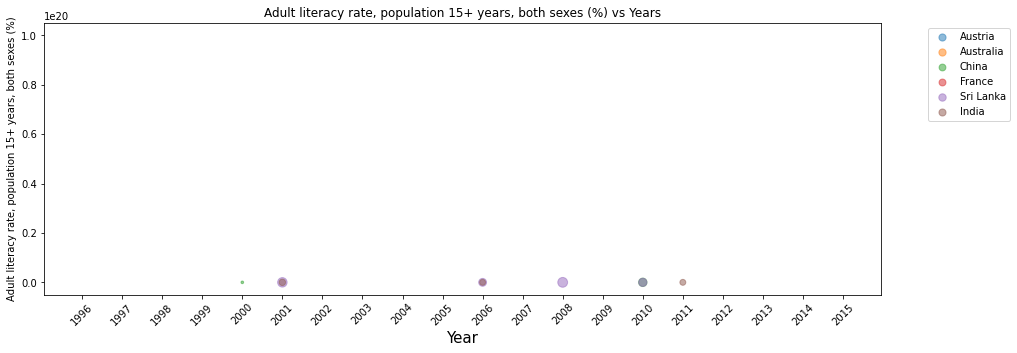

In [51]:
Country_indicator('Adult literacy rate, population 15+ years, both sexes (%)',1996,'Austria','Australia','China','France','Sri Lanka','India')

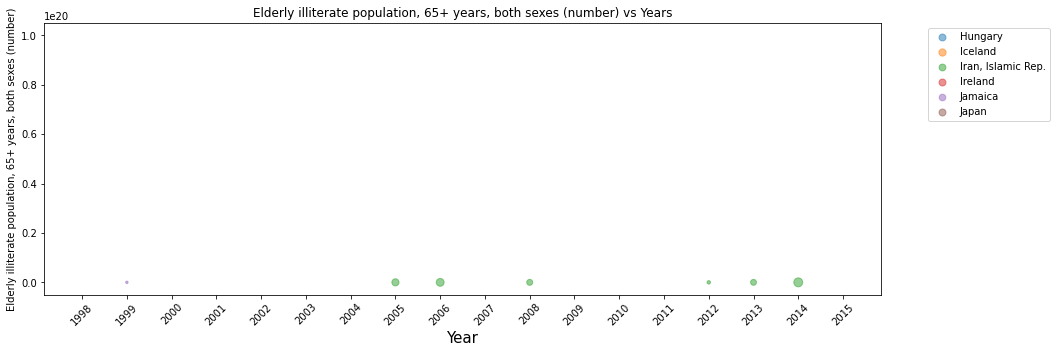

In [52]:
Country_indicator('Elderly illiterate population, 65+ years, both sexes (number)',1998,'Hungary','Iceland','Iran, Islamic Rep.','Ireland','Jamaica','Japan')